# Salaries pre-processing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sal_21_22 = pd.read_csv('DB_Salaries_21_22.csv')
sal_20_21 = pd.read_csv('DB_Salaries_20_21.csv')
sal_19_20 = pd.read_csv('DB_Salaries_19_20.csv')
sal_18_19 = pd.read_csv('DB_Salaries_18_19.csv')
sal_17_18 = pd.read_csv('DB_Salaries_17_18.csv')



In [2]:
sal_21_22 = pd.read_csv('DB_Salaries_21_22.csv').set_index('Unnamed: 0')
sal_20_21 = pd.read_csv('DB_Salaries_20_21.csv').set_index('Unnamed: 0')
sal_19_20 = pd.read_csv('DB_Salaries_19_20.csv').set_index('Unnamed: 0')
sal_18_19 = pd.read_csv('DB_Salaries_18_19.csv').set_index('Unnamed: 0')
sal_17_18 = pd.read_csv('DB_Salaries_17_18.csv').set_index('Unnamed: 0')

In [3]:
sal_21_22

,Player,Team,Annual Salary
Unnamed: 0,,,
0,"Stephen Curry, PG",Golden State Warriors,"$45,780,966"
1,"James Harden, SG",Philadelphia 76ers,"$44,310,840"
2,"John Wall, PG",Houston Rockets,"$44,310,840"
3,"Russell Westbrook, PG",Los Angeles Lakers,"$44,211,146"
4,"Kevin Durant, PF",Brooklyn Nets,"$42,018,900"
...,...,...,...
496,"Juwan Morgan, F",Toronto Raptors,"$19,816"
497,"Moses Brown, C",Cleveland Cavaliers,"$19,186"
498,"Xavier Sneed, F",Utah Jazz,"$8,558"


In [4]:
sal_21_22['Year'] = 2022
sal_20_21['Year'] = 2021
sal_19_20['Year'] = 2020
sal_18_19['Year'] = 2019
sal_17_18['Year'] = 2018

In [5]:
sal = pd.concat([sal_21_22, sal_20_21, sal_19_20, sal_18_19, sal_17_18])
sal.reset_index()

,Unnamed: 0,Player,Team,Annual Salary,Year
0,0,"Stephen Curry, PG",Golden State Warriors,"$45,780,966",2022
1,1,"James Harden, SG",Philadelphia 76ers,"$44,310,840",2022
2,2,"John Wall, PG",Houston Rockets,"$44,310,840",2022
3,3,"Russell Westbrook, PG",Los Angeles Lakers,"$44,211,146",2022
4,4,"Kevin Durant, PF",Brooklyn Nets,"$42,018,900",2022
...,...,...,...,...,...
2680,584,"Marquis Teague, G",Boston Celtics,"$74,186",2018
2681,585,"Mike Tobey, C",Dallas Mavericks,"$67,135",2018
2682,586,"MarShon Brooks, G",Los Angeles Lakers,"$60,283",2018
2683,587,"Jordan Crawford, G",Houston Rockets,"$58,190",2018


In [6]:
sal[['Player','Position']] = sal.Player.str.rsplit(',', 1, expand = True,)

In [7]:
sal.drop(['Position'], axis = 1, inplace = True)

In [8]:
sal

,Player,Team,Annual Salary,Year
Unnamed: 0,,,,
0,Stephen Curry,Golden State Warriors,"$45,780,966",2022
1,James Harden,Philadelphia 76ers,"$44,310,840",2022
2,John Wall,Houston Rockets,"$44,310,840",2022
3,Russell Westbrook,Los Angeles Lakers,"$44,211,146",2022
4,Kevin Durant,Brooklyn Nets,"$42,018,900",2022
...,...,...,...,...
584,Marquis Teague,Boston Celtics,"$74,186",2018
585,Mike Tobey,Dallas Mavericks,"$67,135",2018
586,MarShon Brooks,Los Angeles Lakers,"$60,283",2018


Stats pre-processing

In [9]:
stats = pd.read_csv('Player_Stats.csv')

In [10]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18885 non-null  int64 
 1   Rk          18885 non-null  object
 2   Player      18885 non-null  object
 3   Pos         18885 non-null  object
 4   Age         18885 non-null  object
 5   Tm          18885 non-null  object
 6   G           18885 non-null  object
 7   GS          18885 non-null  object
 8   MP          18885 non-null  object
 9   FG          18885 non-null  object
 10  FGA         18885 non-null  object
 11  FG%         18779 non-null  object
 12  3P          18885 non-null  object
 13  3PA         18885 non-null  object
 14  3P%         16029 non-null  object
 15  2P          18885 non-null  object
 16  2PA         18885 non-null  object
 17  2P%         18709 non-null  object
 18  eFG%        18779 non-null  object
 19  FT          18885 non-null  object
 20  FTA   

In [11]:
stats_new = stats[stats['Year'].isin([2018, 2019, 2020, 2021, 2022])]

In [12]:
import unidecode
lst = []

for i in stats_new['Player']:
    temp = unidecode.unidecode(i)
    lst.append(temp)

In [13]:
stats_new['Player_uni'] = lst

C:\Users\nunof\AppData\Local\Temp/ipykernel_14508/535091382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_new['Player_uni'] = lst


In [14]:
stats_new

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni
15216,0,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018,Alex Abrines
15217,1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy
15218,2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018,Steven Adams
15219,3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018,Bam Adebayo
15220,4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,836,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,...,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022,Thaddeus Young
18881,837,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022,Trae Young
18882,838,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022,Omer Yurtseven
18883,839,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022,Cody Zeller


In [15]:
stats_new.reset_index(inplace = True)

In [16]:
stats_new.drop(columns = ['index', 'Unnamed: 0'], inplace = True)

C:\Users\nunof\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
stats_new

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni
0,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,2018,Alex Abrines
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,2018,Steven Adams
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,2018,Bam Adebayo
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3,2022,Thaddeus Young
3665,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022,Trae Young
3666,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022,Omer Yurtseven
3667,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022,Cody Zeller


Merge

In [18]:
df = stats_new.merge(sal, how = 'left', left_on = ['Player_uni', 'Year'], right_on = ['Player', 'Year'])

In [19]:
df.drop('Team', axis = 1, inplace = True)

In [20]:
df

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
0,1,Álex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.4,0.5,0.1,0.3,1.7,4.7,2018,Alex Abrines,Alex Abrines,"$5,725,000"
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy,NaN,NaN
2,3,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,1.2,1.2,1.0,1.7,2.8,13.9,2018,Steven Adams,Steven Adams,"$22,471,910"
3,4,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,1.5,0.5,0.6,1.0,2.0,6.9,2018,Bam Adebayo,Bam Adebayo,"$2,955,840"
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,1.7,1.2,0.4,0.8,1.7,6.3,2022,Thaddeus Young,Thaddeus Young,"$14,190,000"
3668,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,9.7,0.9,0.1,4.0,1.7,28.4,2022,Trae Young,Trae Young,"$8,326,471"
3669,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.9,0.3,0.4,0.7,1.5,5.3,2022,Omer Yurtseven,Omer Yurtseven,"$1,489,065"
3670,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.8,0.3,0.2,0.7,2.1,5.2,2022,Cody Zeller,NaN,NaN


In [21]:
df[df['Annual Salary'].isna()]['G'].value_counts()

G     129
2      59
1      58
3      52
4      45
     ... 
67      1
35      1
45      1
72      1
61      1
Name: G, Length: 77, dtype: int64

In [22]:
df.drop(df[df['G'] == 'G'].index, inplace = True)

In [23]:
df[df['G'] == 'G']

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary


In [24]:
df[df['Annual Salary'].isna()]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy,NaN,NaN
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo,NaN,NaN
8,9,Kadeem Allen,PG,25,BOS,18,1,5.9,0.3,1.2,...,0.7,0.2,0.1,0.5,0.8,1.1,2018,Kadeem Allen,NaN,NaN
18,19,Ryan Arcidiacono,PG,23,CHI,24,0,12.7,0.7,1.7,...,1.5,0.5,0.0,0.5,0.8,2.0,2018,Ryan Arcidiacono,NaN,NaN
21,22,Jamel Artis,SG,25,ORL,15,1,18.6,2.1,5.3,...,1.2,0.1,0.2,0.5,0.7,5.1,2018,Jamel Artis,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,599,Moses Wright,PF,23,TOT,4,0,3.5,0.3,1.0,...,0.5,0.0,0.3,0.0,0.0,1.3,2022,Moses Wright,NaN,NaN
3661,599,Moses Wright,PF,23,LAC,1,0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2022,Moses Wright,NaN,NaN
3662,599,Moses Wright,PF,23,DAL,3,0,4.3,0.3,1.3,...,0.3,0.0,0.3,0.0,0.0,1.7,2022,Moses Wright,NaN,NaN
3663,600,Gabe York,SG,28,IND,2,0,10.5,1.0,3.5,...,2.0,1.0,0.5,0.5,2.0,4.0,2022,Gabe York,NaN,NaN


In [25]:
df_18 = df[(df['Year'] == 2018)]

In [26]:
df_18.drop(df_18[df_18['Player_uni'].duplicated()].index, inplace = True)

C:\Users\nunof\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
df_18[df_18['Annual Salary'].isna()]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
1,2,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.8,0.5,0.4,0.9,2.1,5.9,2018,Quincy Acy,NaN,NaN
4,5,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.6,0.1,0.2,0.4,1.1,3.4,2018,Arron Afflalo,NaN,NaN
8,9,Kadeem Allen,PG,25,BOS,18,1,5.9,0.3,1.2,...,0.7,0.2,0.1,0.5,0.8,1.1,2018,Kadeem Allen,NaN,NaN
18,19,Ryan Arcidiacono,PG,23,CHI,24,0,12.7,0.7,1.7,...,1.5,0.5,0.0,0.5,0.8,2.0,2018,Ryan Arcidiacono,NaN,NaN
21,22,Jamel Artis,SG,25,ORL,15,1,18.6,2.1,5.3,...,1.2,0.1,0.2,0.5,0.7,5.1,2018,Jamel Artis,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,522,Matt Williams,SG,24,MIA,3,0,3.7,0.7,2.0,...,0.0,0.0,0.0,0.3,0.3,1.7,2018,Matt Williams,NaN,NaN
669,525,Jamil Wilson,SF,27,LAC,15,10,18.3,2.5,5.4,...,0.7,0.3,0.5,0.5,2.3,7.0,2018,Jamil Wilson,NaN,NaN
672,528,Nate Wolters,PG,26,UTA,5,0,3.8,0.2,1.2,...,0.2,0.0,0.0,0.0,0.2,0.4,2018,Nate Wolters,NaN,NaN
678,532,James Young,SG,22,PHI,6,0,10.2,0.8,2.3,...,0.3,0.0,0.0,0.2,0.7,2.8,2018,James Young,NaN,NaN


In [28]:
df_19 = df[(df['Year'] == 2019)]
df_19.drop(df_19[df_19['Player_uni'].duplicated()].index, inplace = True)


C:\Users\nunof\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
df_19[df_19['Player_uni'].duplicated()]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary


In [30]:
df_20 = df[(df['Year'] == 2020)]
df_20.drop(df_20[df_20['Player_uni'].duplicated()].index, inplace = True)

df_21 = df[(df['Year'] == 2021)]
df_21.drop(df_21[df_21['Player_uni'].duplicated()].index, inplace = True)

df_22 = df[(df['Year'] == 2022)]
df_22.drop(df_22[df_22['Player_uni'].duplicated()].index, inplace = True)

C:\Users\nunof\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [31]:
df_22[df_22['Player_uni'].duplicated()]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary


In [32]:
stat = pd.concat([df_19, df_20, df_21, df_22])

In [33]:
stat['G'] = stat['G'].astype(int)
stat['PTS'] = stat['PTS'].astype(float)

In [34]:
stat[stat['Player_uni'] == 'Kevin Durant']

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
886,150,Kevin Durant,SF,30,GSW,78,78,34.6,9.2,17.7,...,5.9,0.7,1.1,2.9,2.0,26.0,2019,Kevin Durant,Kevin Durant,"$30,000,000"
2286,140,Kevin Durant,PF,32,BRK,35,32,33.1,9.3,17.2,...,5.6,0.7,1.3,3.4,2.0,26.9,2021,Kevin Durant,Kevin Durant,"$40,108,950"
3035,154,Kevin Durant,PF,33,BRK,55,55,37.2,10.5,20.3,...,6.4,0.9,0.9,3.5,2.1,29.9,2022,Kevin Durant,Kevin Durant,"$42,018,900"


In [35]:
stat

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
689,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.6,0.5,0.2,0.5,1.7,5.3,2019,Alex Abrines,Alex Abrines,"$5,455,236"
690,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.8,0.1,0.4,0.4,2.4,1.7,2019,Quincy Acy,NaN,NaN
691,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.9,0.4,0.1,0.8,1.3,3.2,2019,Jaylen Adams,Jaylen Adams,"$270,014"
692,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,1.6,1.5,1.0,1.7,2.6,13.9,2019,Steven Adams,Steven Adams,"$24,157,303"
693,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,2.2,0.9,0.8,1.5,2.5,8.9,2019,Bam Adebayo,Bam Adebayo,"$2,955,840"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.0,1.0,0.3,1.0,1.6,6.2,2022,Thaddeus Young,Thaddeus Young,"$14,190,000"
3668,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,9.7,0.9,0.1,4.0,1.7,28.4,2022,Trae Young,Trae Young,"$8,326,471"
3669,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.9,0.3,0.4,0.7,1.5,5.3,2022,Omer Yurtseven,Omer Yurtseven,"$1,489,065"
3670,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.8,0.3,0.2,0.7,2.1,5.2,2022,Cody Zeller,NaN,NaN


In [36]:
stat.drop(stat[(stat['Annual Salary'].isna()) & (stat['G'] <= 16)].index, inplace = True) #drop on players that have played less than 20 % of the games

In [37]:
stat[(stat['Annual Salary'].isna()) & (stat['PTS'] >= 10)]

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,Year,Player_uni,Player_y,Annual Salary
1077,285,Kevin Knox,PF,19,NYK,75,57,28.8,4.5,12.2,...,1.1,0.6,0.3,1.5,2.3,12.8,2019,Kevin Knox,NaN,NaN
1187,361,Marcus Morris,PF,29,BOS,75,53,27.9,5.0,11.3,...,1.5,0.6,0.3,1.2,2.4,13.9,2019,Marcus Morris,NaN,NaN
1264,418,J.J. Redick,SG,34,PHI,76,63,31.3,5.9,13.5,...,2.7,0.4,0.2,1.3,1.7,18.1,2019,J.J. Redick,NaN,NaN
1871,351,Marcus Morris,SF-PF,30,TOT,62,62,31.2,5.7,13.1,...,1.4,0.8,0.5,1.6,2.9,16.7,2020,Marcus Morris,NaN,NaN
1952,419,J.J. Redick,SG,35,NOP,60,36,26.4,4.8,10.5,...,2.0,0.3,0.2,1.3,1.6,15.3,2020,J.J. Redick,NaN,NaN
2190,70,Armoni Brooks,SG,22,HOU,20,5,26.0,3.9,9.6,...,1.5,0.6,0.3,1.1,1.7,11.2,2021,Armoni Brooks,NaN,NaN
2573,354,Marcus Morris,PF,31,LAC,57,29,26.4,4.8,10.2,...,1.0,0.6,0.3,1.0,2.1,13.4,2021,Marcus Morris,NaN,NaN
3380,393,Marcus Morris,PF,32,LAC,54,54,29.0,5.6,12.8,...,2.1,0.5,0.3,1.3,2.1,15.4,2022,Marcus Morris,NaN,NaN
3643,584,Brandon Williams,PG,22,POR,24,16,26.7,4.4,11.8,...,3.9,1.0,0.4,2.4,2.2,12.9,2022,Brandon Williams,NaN,NaN
3648,589,Robert Williams,C,24,BOS,61,61,29.6,4.4,6.0,...,2.0,0.9,2.2,1.0,2.2,10.0,2022,Robert Williams,NaN,NaN


In [38]:
stat['Annual Salary'][(stat['Player_uni'] == 'J.J. Redick') & (stat['Year'] == 2019)] = '$12,500,000'

C:\Users\nunof\AppData\Local\Temp/ipykernel_14508/2323222924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat['Annual Salary'][(stat['Player_uni'] == 'J.J. Redick') & (stat['Year'] == 2019)] = '$12,500,000'


In [39]:
stat['Annual Salary'][(stat['Player_uni'] == 'J.J. Redick') & (stat['Year'] == 2020)] = '$13,486,300'
stat['Annual Salary'][(stat['Player_uni'] == 'Marcus Morris') & (stat['Year'] == 2019)] = '$15,000,000'
stat['Annual Salary'][(stat['Player_uni'] == 'Marcus Morris') & (stat['Year'] == 2020)] = '$15,000,000'
stat['Annual Salary'][(stat['Player_uni'] == 'Marcus Morris') & (stat['Year'] == 2021)] = '$14,883,721'
stat['Annual Salary'][(stat['Player_uni'] == 'Marcus Morris') & (stat['Year'] == 2022)] = '$15,627,907'
stat['Annual Salary'][(stat['Player_uni'] == 'Kevin Knox') & (stat['Year'] == 2019)] = '$3,739,920'
stat['Annual Salary'][(stat['Player_uni'] == 'Robert Williams') & (stat['Year'] == 2022)] = '$3,661,976'

# manualy imputed annual salaries from players that had 12 pts or higher because it was detected that when merging both datasets, the name was different (Sr. or JJ question)

C:\Users\nunof\AppData\Local\Temp/ipykernel_14508/1669784715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat['Annual Salary'][(stat['Player_uni'] == 'J.J. Redick') & (stat['Year'] == 2020)] = '$13,486,300'
C:\Users\nunof\AppData\Local\Temp/ipykernel_14508/1669784715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stat['Annual Salary'][(stat['Player_uni'] == 'Marcus Morris') & (stat['Year'] == 2019)] = '$15,000,000'
C:\Users\nunof\AppData\Local\Temp/ipykernel_14508/1669784715.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

In [40]:
stat.drop(columns = ['Player_uni', 'Player_y'], inplace = True)

In [41]:
stat

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Annual Salary
689,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,2019,"$5,455,236"
691,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,2019,"$270,014"
692,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,2019,"$24,157,303"
693,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,2019,"$2,955,840"
694,6,Deng Adel,SF,21,CLE,19,3,10.2,0.6,1.9,...,0.8,1.0,0.3,0.1,0.2,0.3,0.7,1.7,2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,2022,"$14,190,000"
3668,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022,"$8,326,471"
3669,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022,"$1,489,065"
3670,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,2022,NaN


In [42]:
stat.drop(stat[stat['Annual Salary'].isna()].index, inplace = True)

In [43]:
stat

,Rk,Player_x,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year,Annual Salary
689,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3,2019,"$5,455,236"
691,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,2019,"$270,014"
692,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,2019,"$24,157,303"
693,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9,2019,"$2,955,840"
696,8,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,...,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,2019,"$22,347,015"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,597,Delon Wright,SG,29,ATL,77,8,18.9,1.6,3.5,...,2.2,2.9,2.4,1.2,0.2,0.6,0.7,4.4,2022,"$8,526,316"
3665,601,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.5,4.0,2.0,1.0,0.3,1.0,1.6,6.2,2022,"$14,190,000"
3668,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4,2022,"$8,326,471"
3669,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,2022,"$1,489,065"


In [45]:
stat['Annual Salary'] = stat['Annual Salary'].apply(lambda x: x.replace(',',''))
stat['Annual Salary'] = stat['Annual Salary'].apply(lambda x: x.replace('$',''))


<AxesSubplot:>

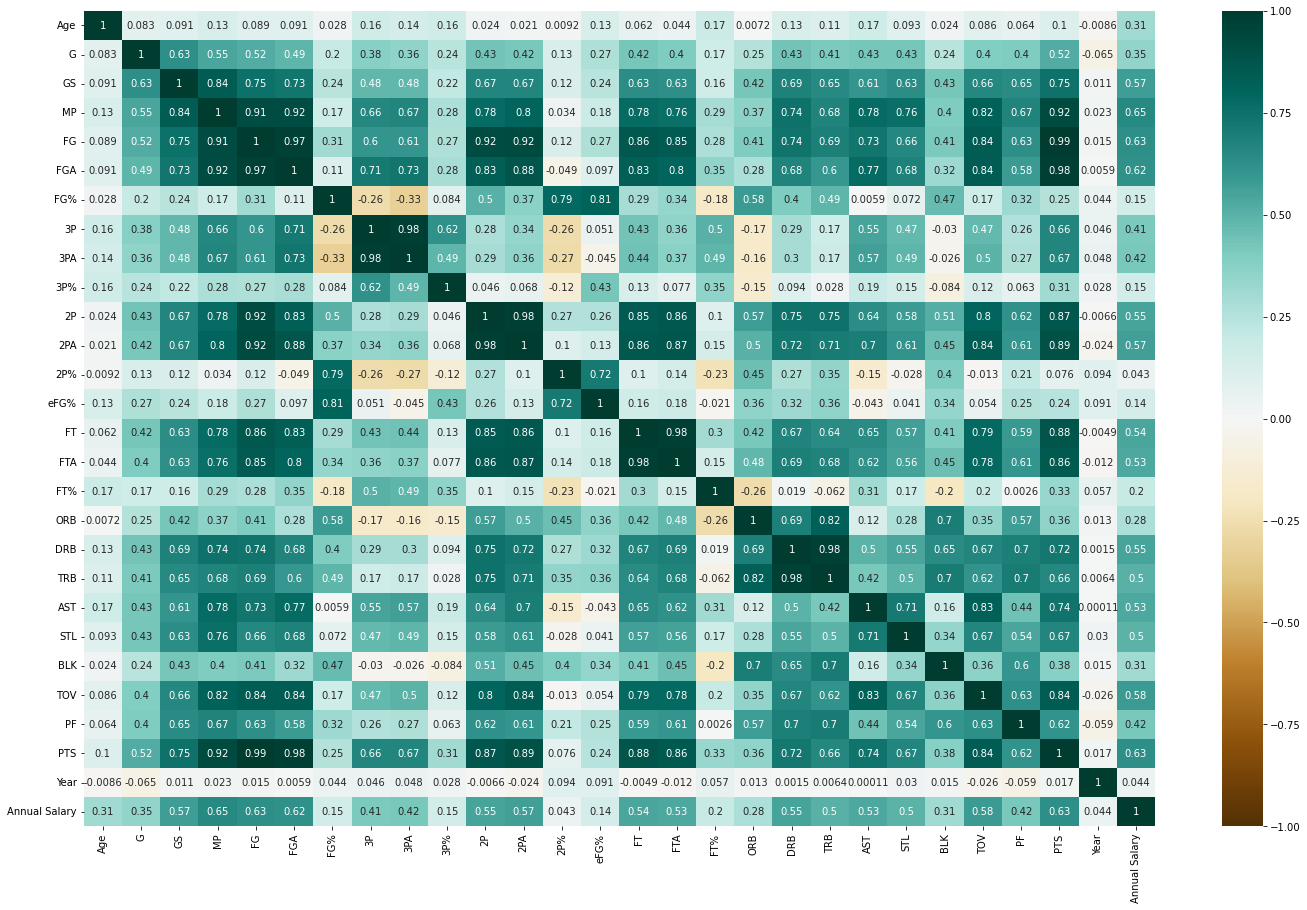

In [57]:
cluster_corr = stat.corr(method = 'spearman') 
## matriz correlação entre todas as minhas variáveis 
figure = plt.figure(figsize = (24,15)) 
## o tamanho da nova figura
sns.heatmap(cluster_corr, annot=True, fmt = '.2g',vmin=-1, vmax=1, cmap='BrBG')
## definir casas decimais 



In [47]:
columns = stat.columns.values.tolist()
for i in columns[5:]:
    stat[i] = stat[i].astype('float64')

stat['Age'] = stat['Age'].astype('float64')
stat['Player_x'] = stat['Player_x'].astype('str')

In [48]:
stat['Annual Salary'] = stat['Annual Salary']/1000

<AxesSubplot:xlabel='Age', ylabel='Count'>

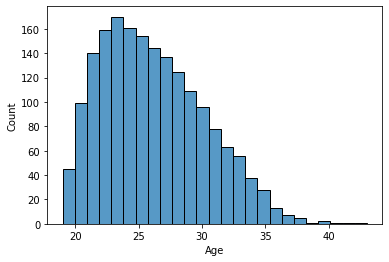

In [49]:
sns.histplot(data = stat['Age'])

<AxesSubplot:xlabel='Age', ylabel='Annual Salary'>

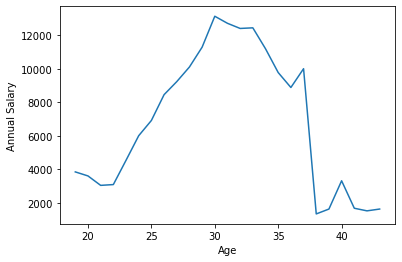

In [50]:
sns.lineplot(data = stat.groupby('Age')['Annual Salary'].mean())

<AxesSubplot:xlabel='Year', ylabel='Annual Salary'>

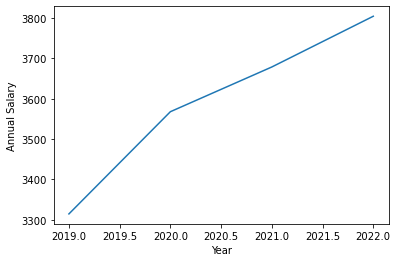

In [51]:
sns.lineplot(data = stat.groupby('Year')['Annual Salary'].median())

<AxesSubplot:xlabel='Year', ylabel='Annual Salary'>

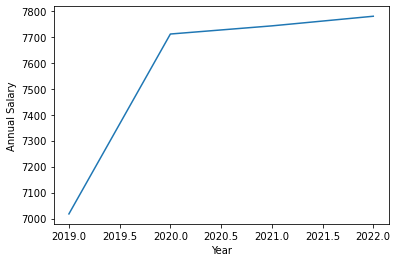

In [52]:
sns.lineplot(data = stat.groupby('Year')['Annual Salary'].mean())

In [53]:
AgeSal = pd.DataFrame({'2019' :  stat[stat['Year']== 2019].groupby('Age')['Annual Salary'].mean()}
                     )

for i in [2020,2021,2022]:
    AgeSal[i] = pd.DataFrame({'i' :  stat[stat['Year']== i].groupby('Age')['Annual Salary'].mean()})
    
AgeSal

,2019,2020,2021,2022
Age,,,,
19.0,3497.231273,3584.353636,4581.023333,3632.952727
20.0,3127.285043,3639.482667,3424.460769,4156.548385
21.0,2728.344235,3335.011313,3067.505583,3028.920447
22.0,2301.245543,2888.948913,3774.241162,3344.231829
23.0,4296.398444,4858.748806,4208.109256,4815.387565
24.0,4700.089410,6025.879500,7095.591486,6234.161634
25.0,6937.226625,6540.242429,6691.353163,7517.779306
26.0,8568.078081,7104.010775,8989.092457,9431.782156
27.0,8230.991742,9986.910500,7691.857029,10948.081879


<AxesSubplot:xlabel='Age'>

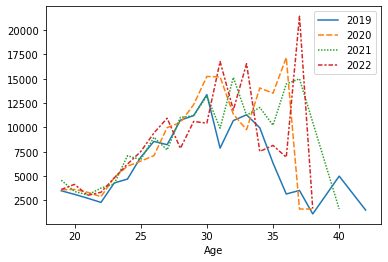

In [54]:
sns.lineplot(data = AgeSal)